<a href="https://colab.research.google.com/github/panghanwu/build_neural_network_python/blob/main/MLP_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

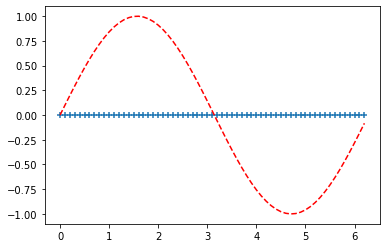

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"""Initializing"""
# data
x = np.arange(0, np.pi*2, 0.1)  # input data
t = np.sin(x)  # correct answer

# parameter
n_data = len(x)
wb_shrinker = 0.01 #  initialize
eta = 0.1  # learning rate

# initial 
w1 = wb_shrinker * np.random.randn(1,3)
b1 = wb_shrinker * np.random.randn(3)
w2 = wb_shrinker * np.random.randn(3,1)
b2 = wb_shrinker * np.random.randn(1)

y = []
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y = np.dot(y1, w2) + b2

plt.plot(x, t, 'r--')
plt.scatter(x, y, marker='+')

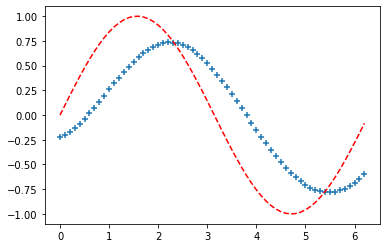

In [5]:
"""Training with single data"""
y = []
for i in range(n_data):
  # forward
  u1 = np.dot(x[i].reshape(-1,1), w1) + b1
  y1 = 1/(1+np.exp(-u1))
  y2 = np.dot(y1, w2) + b2

  # backward
  delta2 = y2 - t[i].reshape(-1,1)
  grad_w2 = np.dot(y1.T, delta2)
  grad_b2 = np.sum(delta2, axis=0)
  grad_y1 = np.dot(delta2, w2.T)
  delta1 = grad_y1 * (1-y1) * y1
  grad_w1 = np.dot(x[i].reshape(-1,1).T, delta1)
  grad_b1 = np.sum(delta1, axis=0)

  # update
  w1 -= eta * grad_w1
  b1 -= eta * grad_b1
  w2 -= eta * grad_w2
  b2 -= eta * grad_b2

  y.append(float(y2))

plt.plot(x, t, 'r--')
plt.scatter(x, y, marker='+')

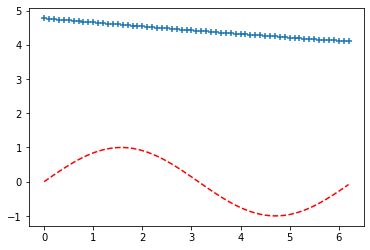

In [7]:
"""Training with whole data"""
# forward
u1 = np.dot(x.reshape(-1,1), w1) + b1
y1 = 1/(1+np.exp(-u1))
y = np.dot(y1, w2) + b2

# backward
delta2 = y2 - t.reshape(-1,1)
grad_w2 = np.dot(y1.T, delta2)
grad_b2 = np.sum(delta2, axis=0)
grad_y1 = np.dot(delta2, w2.T)
delta1 = grad_y1 * (1-y1) * y1
grad_w1 = np.dot(x.reshape(-1,1).T, delta1)
grad_b1 = np.sum(delta1, axis=0)

# update
w1 -= eta * grad_w1
b1 -= eta * grad_b1
w2 -= eta * grad_w2
b2 -= eta * grad_b2

plt.plot(x, t, 'r--')
plt.scatter(x, y, marker='+')